In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="colorblind", font_scale=2.5)
plt.rcParams["font.family"] = "serif"

In [81]:
data = pd.read_csv("../Data/OCRE_clean.csv")
data.count()

Unnamed: 0          112364
Authority           112233
Deity                75239
Denomination        112364
Description         112364
Issuer                1424
Material            112364
Mint                112344
OCRE URL            112364
Obverse Legend      111646
Obverse Type        112363
Portrait            109819
RecordId            112364
Reference                0
Reverse Legend      106802
Reverse Type        112364
Title               112364
URL                 112364
Year                112048
collection          110852
collectionID        112364
hoard                 6108
emperor             106948
emperorDisplayed     93586
cleanDesc           112364
StartDate           112048
EndDate             112048
Source              112364
dtype: int64

In [48]:
data["emperorDisplayed"].unique()

array(['Maximian', 'Galerius', 'Diocletian', 'Antoninus Pius',
       'Constantine I',
       'Constantius Chlorus, Diocletian, Galerius, Maximian', nan,
       'Constantius Chlorus', 'Tiberius', 'Gallienus', 'Marcus Aurelius',
       'Octavian', 'Augustus', 'Julius Caesar', 'Lucius Verus',
       'Licinius', 'Valentinian II', 'Maximinus Daia', 'Gratian',
       'Valens', 'Eugenius', 'Valentinian I', 'Arcadius', 'Theodosius I',
       'Hadrian', 'Valerian', 'Honorius', 'Aurelian', 'Clodius Albinus',
       'Pescennius Niger', 'Didius Julianus', 'Pertinax',
       'Gratian, Valens, Valentinian I', 'Gratian, Valentinian I',
       'Procopius', 'Constantius II', 'Flavius Victor', 'Magnus Maximus',
       'Gordian III', 'Geta', 'Saloninus', 'Probus',
       'Valens, Valentinian I', 'Trajan Decius', 'Jotapianus',
       'Pacatianus', 'Antoninus Pius, Marcus Aurelius', 'Aemilian',
       'Volusian', 'Hostilian', 'Herennius Etruscus', 'Trajan', 'Nerva',
       'Titus', 'Severus II', 'Lucius V

In [49]:
# Order emperors based on the earliest coin minted.
emperor_order = data.groupby(["emperor"])["StartDate"].min()
emperor_order = emperor_order.sort_values()
emperor_order = emperor_order.reset_index()
emperor_order = emperor_order.drop("StartDate", axis=1)
emperor_order = emperor_order.reset_index()
emperor_order = emperor_order.set_index("emperor")

emperor_order.head()

,index
emperor,
Augustus,0
Tiberius,1
Claudius,2
Nero,3
Galba,4


# Figure 4

In [79]:
fig3_df = data[["Material", "Obverse Type"]]
keywords = ["radiate", "laureate", "helmet", "divus"]
for keyword in keywords:
    fig3_df[keyword] = fig3_df["Obverse Type"].apply(lambda desc: 1 if keyword in str(desc).lower() else 0)
    
fig3_df = fig3_df.groupby(["Material"]).sum()
fig3_df = fig3_df.reset_index()
fig3_df = fig3_df.melt(id_vars="Material", var_name="Keyword", value_name="Count")
fig3_df["Keyword"] = fig3_df["Keyword"].str.title()
fig3_df["Material"] = fig3_df["Material"].str.title()

fig3_df

<ipython-input-79-868d1a9ae76d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig3_df[keyword] = fig3_df["Obverse Type"].apply(lambda desc: 1 if keyword in str(desc).lower() else 0)


,Material,Keyword,Count
0,Bronze,Radiate,3073
1,Gold,Radiate,99
2,Other,Radiate,205
3,Silver,Radiate,11549
4,Bronze,Laureate,30131
5,Gold,Laureate,2866
6,Other,Laureate,185
7,Silver,Laureate,19173
8,Bronze,Helmet,2737
9,Gold,Helmet,376


In [82]:
fig3_df.to_csv("../Data/fig4.csv")

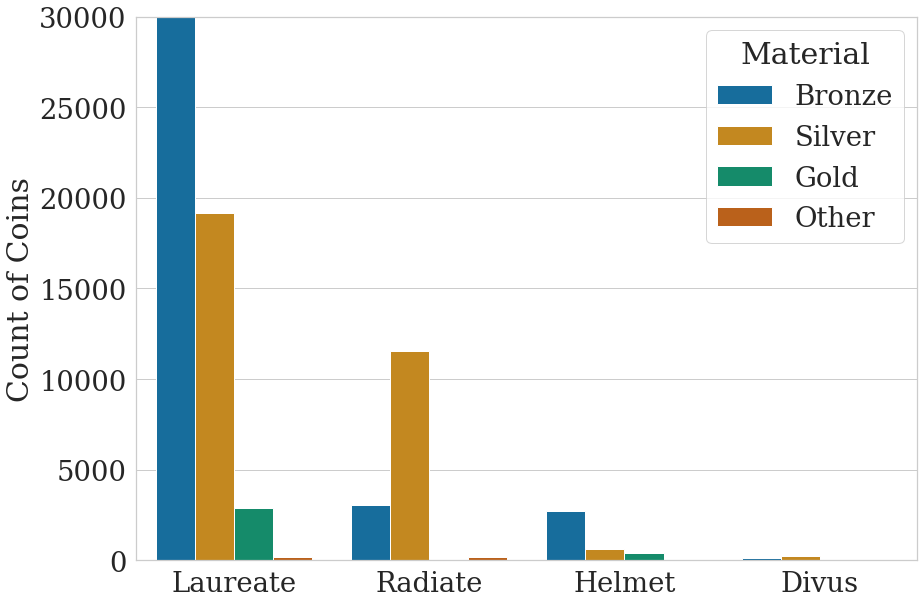

In [80]:
fig, ax = plt.subplots(figsize=(14,10))

material_order = ["Bronze", "Silver", "Gold", "Other"]
headwear_order = ["Laureate", "Radiate", "Helmet", "Divus"]
sns.barplot(x="Keyword", y="Count", hue="Material", order=headwear_order, hue_order=material_order, data=fig3_df, ax=ax)

ax.set_ylabel("Count of Coins")
ax.set_xlabel("")

ax.set_ylim([0, 30000])

plt.savefig("img/headwear_material_counts.pdf", bbox_inches="tight") 

# Figure 15

In [62]:
emperor_col = "emperorDisplayed"
fig15_df = data[["Material", emperor_col, "Obverse Type", "StartDate"]]
fig15_df["radiate"] = fig15_df["cleanDesc"].str.contains("radiate", regex=True) # .apply(lambda desc: 1 if "radiate" in str(desc).lower() else 0)

fig15_df = fig15_df.groupby(["Material", emperor_col])[["radiate", "StartDate"]].agg(["sum", "min"]).reset_index()
fig15_df.columns = [' '.join(col).strip() for col in fig15_df.columns.values]

fig15_df = fig15_df[fig15_df["radiate sum"] != 0]

material_order = ["Bronze", "Silver", "Gold", "Other"]
fig15_df["material_order"] = fig15_df["Material"].apply(lambda x: material_order.index(x.title()))
fig15_df = fig15_df.sort_values(["StartDate min", "material_order"])
emperor_order = fig15_df[emperor_col].unique()
fig15_df = fig15_df[["Material", emperor_col, "radiate sum"]]

fig15_df = fig15_df.pivot(index=emperor_col, columns="Material")
fig15_df.columns = [col[1].title() for col in fig15_df.columns]
print(fig15_df.columns)
fig15_df = fig15_df[material_order]
fig15_df = fig15_df.reindex(emperor_order)
fig15_df = fig15_df.iloc[::-1]

plotting_df = fig15_df.copy(deep=True)

Index(['Bronze', 'Gold', 'Other', 'Silver'], dtype='object')


<ipython-input-62-ef958256d517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig15_df["radiate"] = fig15_df["cleanDesc"].str.contains("radiate", regex=True) # .apply(lambda desc: 1 if "radiate" in str(desc).lower() else 0)


In [83]:
fig15_df.to_csv("../Data/fig15.csv")

<ipython-input-64-bedcbe78748e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


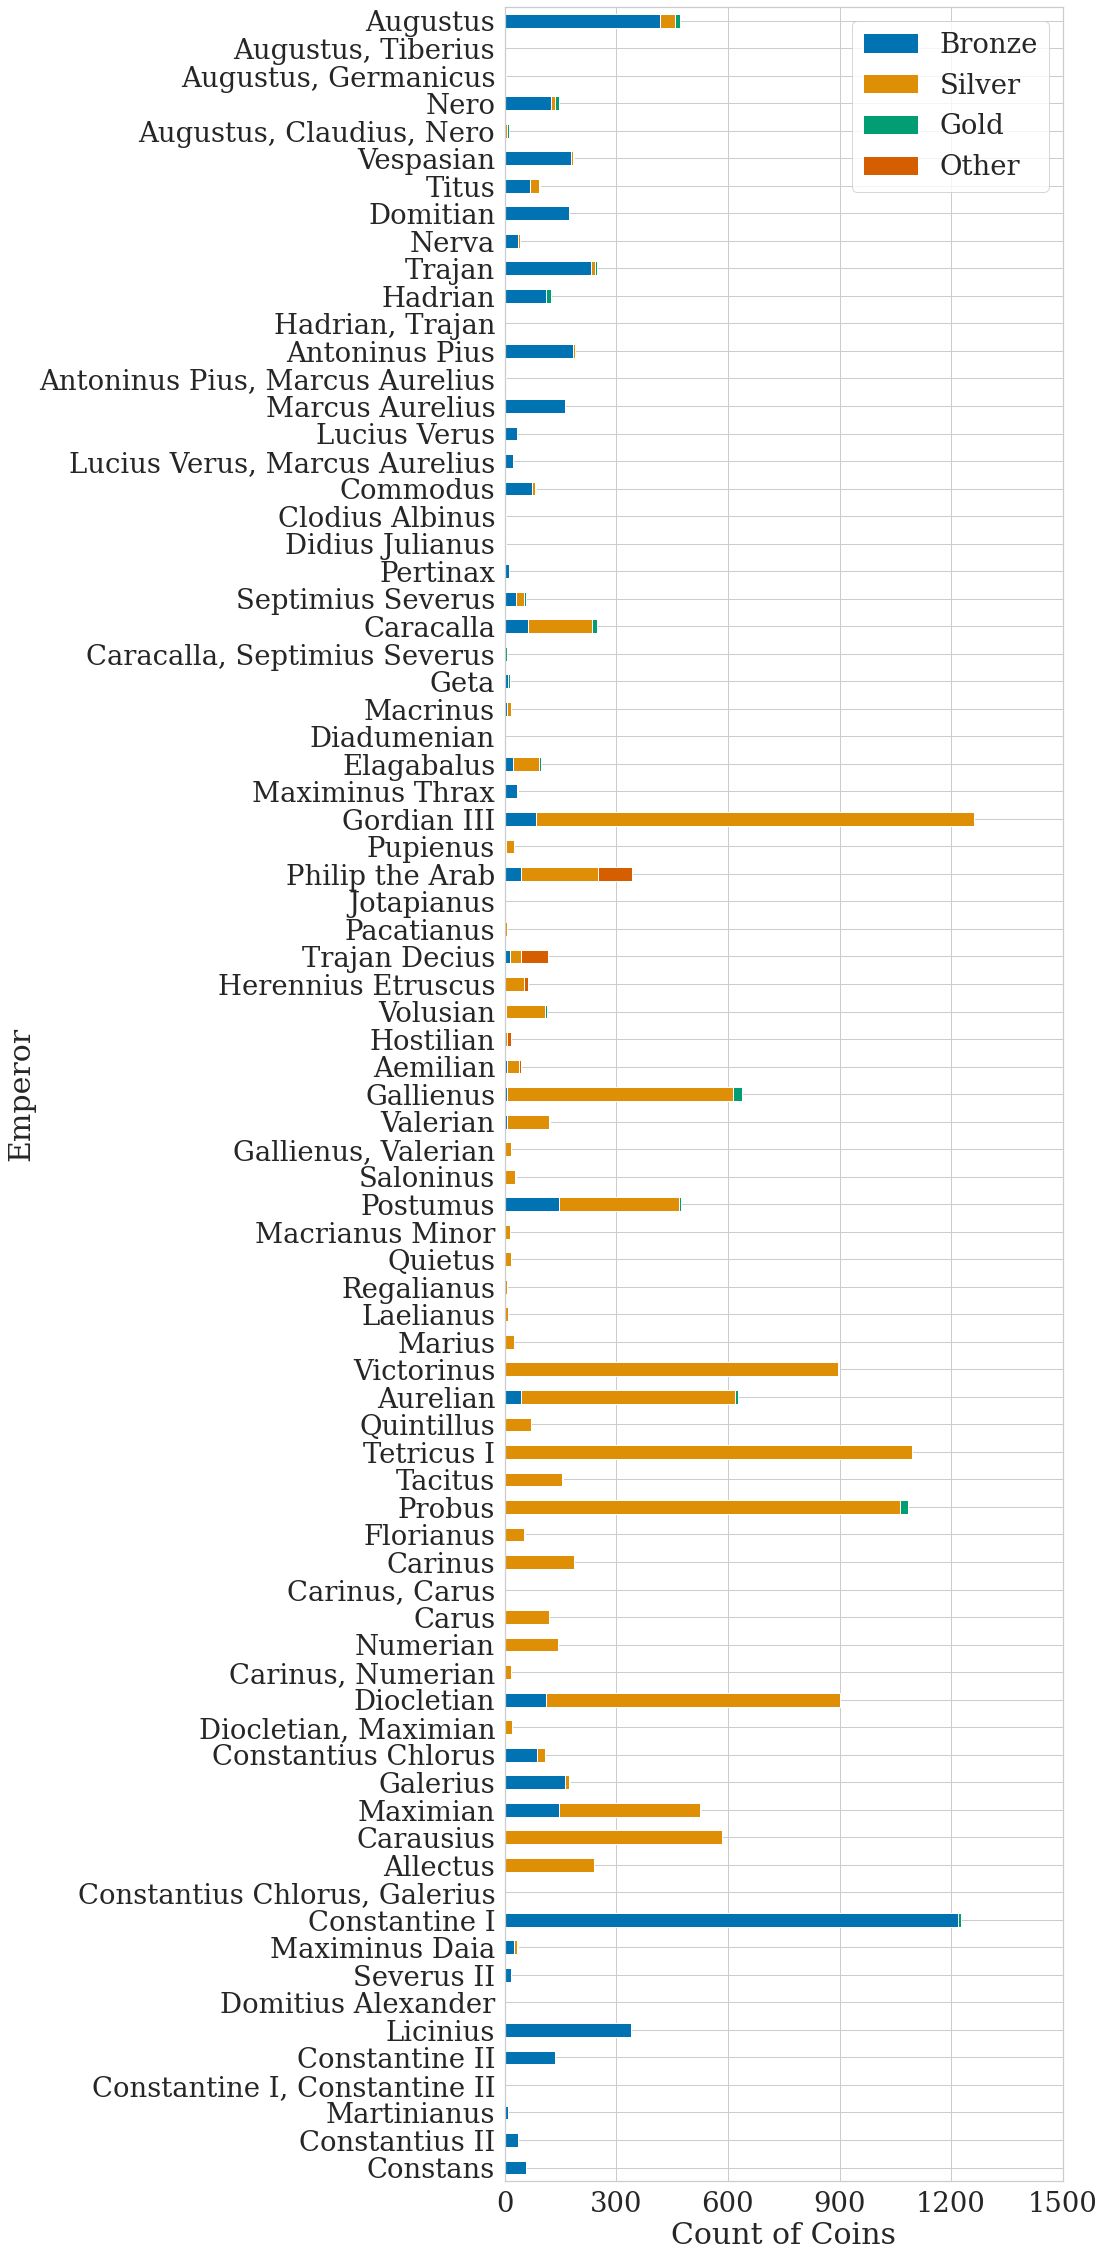

In [64]:
fig, ax = plt.subplots(figsize=(10,40))

plotting_df.plot.barh(stacked=True, ax=ax)

ax.set_xlabel("Count of Coins")
ax.set_ylabel("Emperor")

ax.set_xticks(np.arange(0, 1501, 300))

plt.savefig("img/emeperor_radiate_count_20210823.pdf", bbox_inches="tight") 

fig.show()

# Figure 16

In [69]:
import re

emperor_col = "emperorDisplayed"
fig16_df = data[[emperor_col, "Obverse Type", "StartDate"]]
fig16_df.loc[:, "radiate"] = fig16_df["Obverse Type"].str.contains("radiate")# .apply(lambda desc: 1 if bool(re.search("[^a-zA-Z]+radiate[^a-zA-z]+", str(desc).lower())) else 0)
fig16_df.loc[:, "radiate"] = fig16_df["radiate"].apply(lambda x: 1 if x else 0)

fig16_df = fig16_df.groupby([emperor_col])[["radiate", "StartDate"]].agg(["sum", "min", "count"]).reset_index()
fig16_df.columns = [' '.join(col).strip() for col in fig16_df.columns.values]

fig16_df = fig16_df[fig16_df["radiate sum"] != 0]
fig16_df["radiate ratio"] = 100.0 * fig16_df["radiate sum"] / fig16_df["radiate count"]

fig16_df = fig16_df.sort_values(["StartDate min"])
emperor_order = fig16_df[emperor_col].unique()
# fig16_df = fig16_df[[emperor_col, "radiate ratio"]]
fig16_df = fig16_df.iloc[::-1]

fig16_df.head(10)

/Users/William/Documents/Conjoint/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/William/Documents/Conjoint/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,emperorDisplayed,radiate sum,radiate min,radiate count,StartDate sum,StartDate min,StartDate count,radiate ratio
109,Martinianus,8,1,8,2568.0,321.0,8,100.000000
38,"Constantine I, Constantine II",2,0,6,1914.0,317.0,6,33.333333
41,Constantine II,48,0,2094,685142.0,316.0,2094,2.292264
98,Licinius,114,0,1911,601213.0,308.0,1911,5.965463
37,Constantine I,44,0,6633,2125890.0,305.0,6633,0.663350
112,Maximinus Daia,7,0,1194,368901.0,305.0,1194,0.586265
140,Severus II,18,0,209,63814.0,305.0,209,8.612440
1,Allectus,241,0,251,73543.0,293.0,251,96.015936
46,"Constantius Chlorus, Galerius",1,0,7,2141.0,293.0,7,14.285714
24,Carausius,584,0,601,171886.0,286.0,601,97.171381


In [78]:
fig16_df[
    (fig16_df[emperor_col] == "Constantine I") |
    (fig16_df[emperor_col] == "Gordian III") |
    (fig16_df[emperor_col] == "Tetricus I") |
    (fig16_df[emperor_col] == "Probus") | 
    (fig16_df[emperor_col] == "Aurelian")
]

,emperorDisplayed,radiate sum,radiate min,radiate count,StartDate sum,StartDate min,StartDate count,radiate ratio
37,Constantine I,44,0,6633,2125890.0,305.0,6633,0.663350
130,Probus,1072,0,1184,326809.0,276.0,1184,90.540541
142,Tetricus I,1095,0,1120,303534.0,271.0,1120,97.767857
17,Aurelian,587,0,668,180364.0,270.0,668,87.874251
75,Gordian III,1261,0,1601,385344.0,238.0,1601,78.763273


In [84]:
fig16_df.to_csv("../Data/fig16.csv")

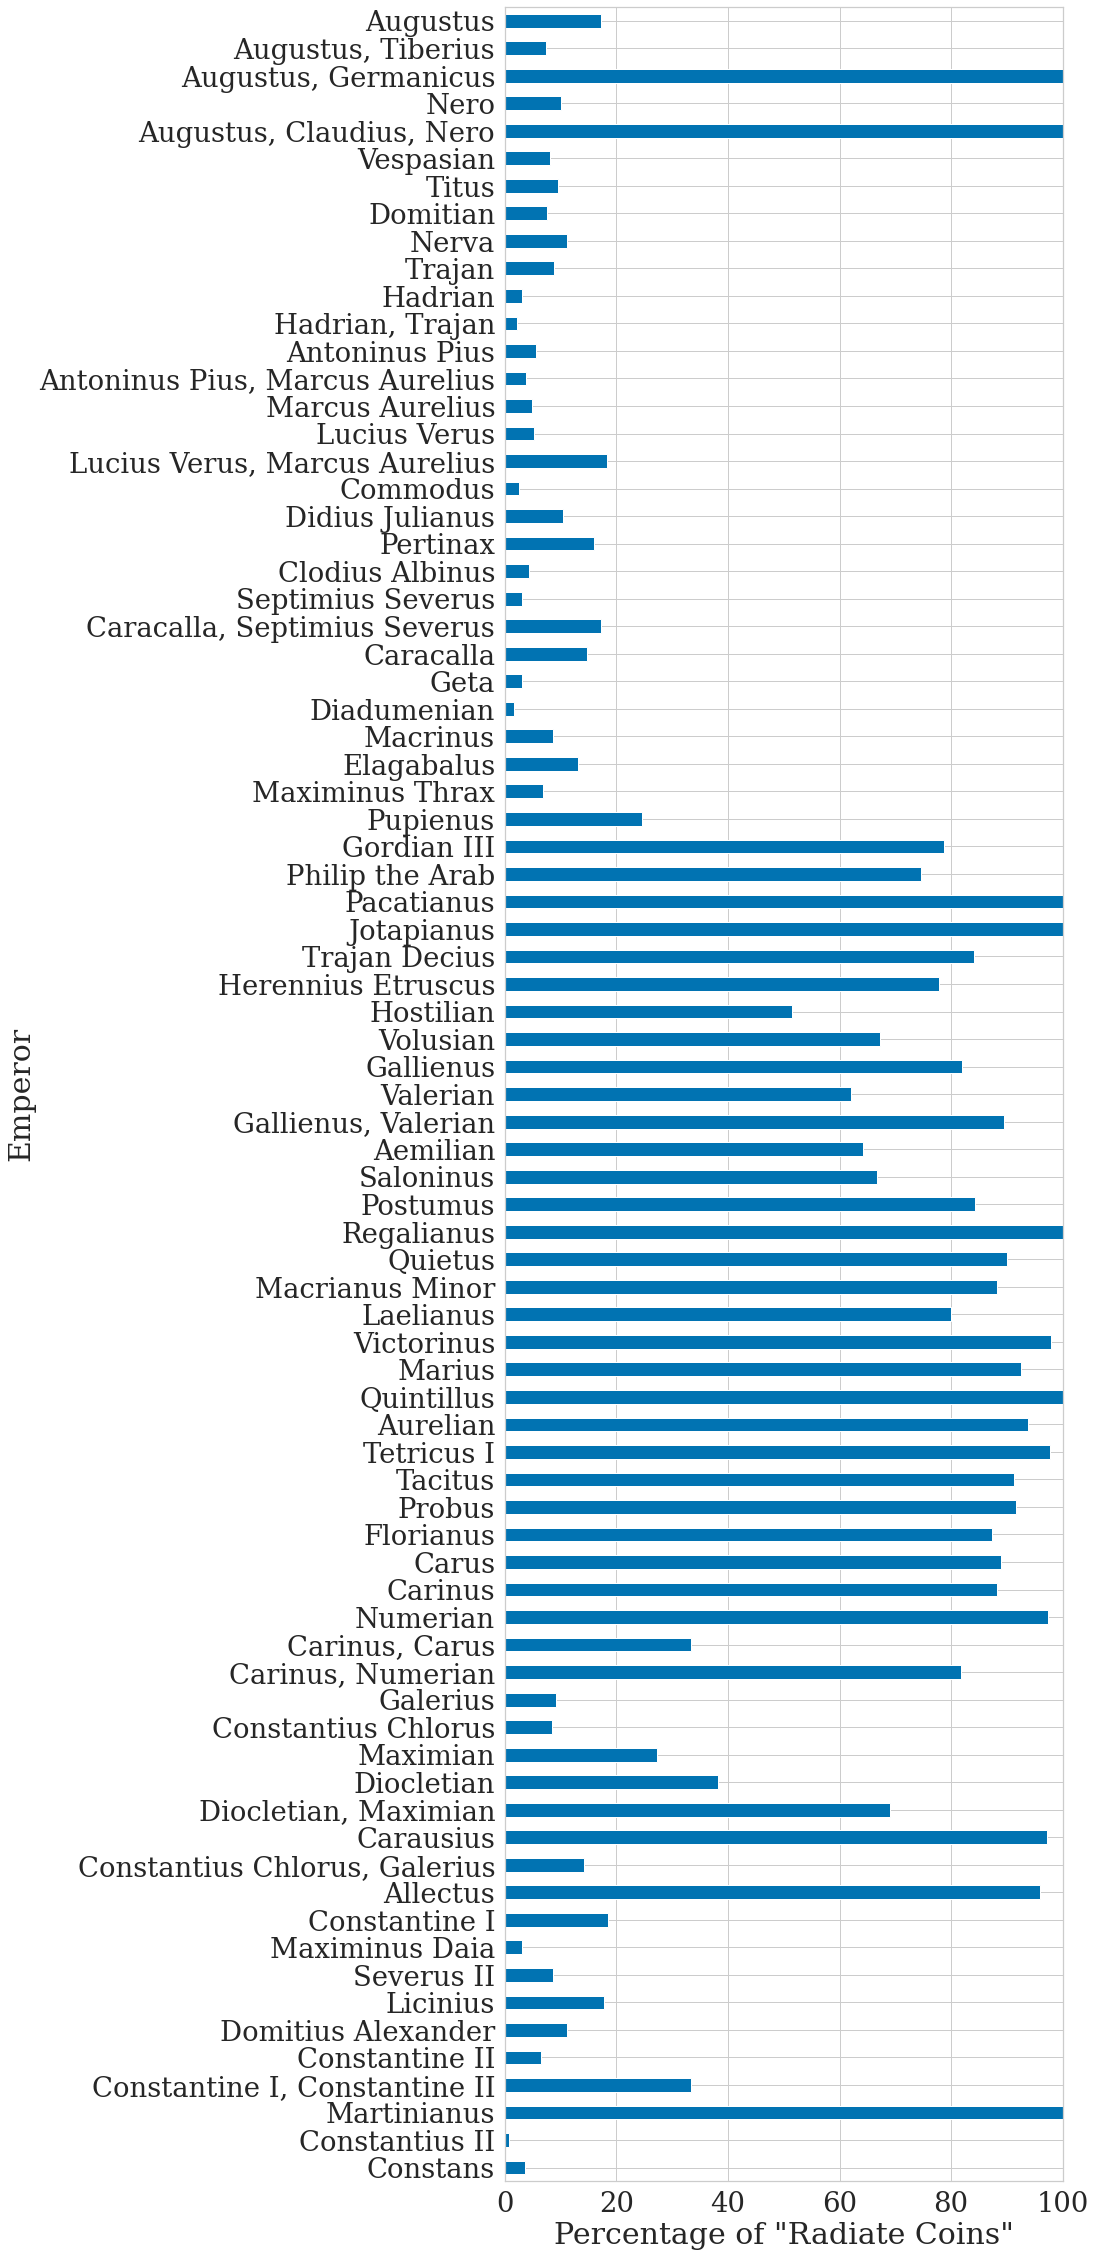

In [61]:
fig, ax = plt.subplots(figsize=(10,40))

fig16_df.plot.barh(x=emperor_col, y="radiate ratio", legend=False, ax=ax)

ax.set_xlabel("Percentage of \"Radiate Coins\"")
ax.set_ylabel("Emperor")

ax.set_xlim([0, 100])

plt.savefig("img/emeperor_radiate_ratio_20210823.pdf", bbox_inches="tight") 

# Figure 17

In [66]:
data[data["emperorDisplayed"] == "Constantine I"].count()

Unnamed: 0          6633
Authority           6633
Deity               3238
Denomination        6633
Description         6633
Issuer                 0
Material            6633
Mint                6633
OCRE URL            6633
Obverse Legend      6573
Obverse Type        6633
Portrait            6633
RecordId            6633
Reference              0
Reverse Legend      6335
Reverse Type        6633
Title               6633
URL                 6633
Year                6633
collection          6529
collectionID        6633
hoard                  0
emperor             6633
emperorDisplayed    6633
cleanDesc           6633
StartDate           6633
EndDate             6633
Source              6633
dtype: int64

In [72]:
# Constantine I

fig17_df = data[["emperorDisplayed", "Obverse Type"]]
fig17_df = fig17_df[fig17_df["emperorDisplayed"] == "Constantine I"]

keywords = ['radiate', 'diadem', 'laureate', 'cuirassed', 'helmet']
for keyword in keywords:
    fig17_df[keyword] = fig17_df["Obverse Type"].str.lower().str.contains(keyword, regex=True)#.apply(lambda desc: 1 if keyword in str(desc).lower() else 0)
fig17_df = fig17_df.drop(["emperorDisplayed", "Obverse Type"], axis=1)
fig17_df = fig17_df.sum().reset_index()
fig17_df.columns = ["keywords", "counts"]
fig17_df["keywords"] = fig17_df["keywords"].str.title()

fig17_df.head()

,keywords,counts
0,Radiate,44
1,Diadem,1105
2,Laureate,4668
3,Cuirassed,3866
4,Helmet,643


In [85]:
fig17_df.to_csv("../Data/fig17.csv")

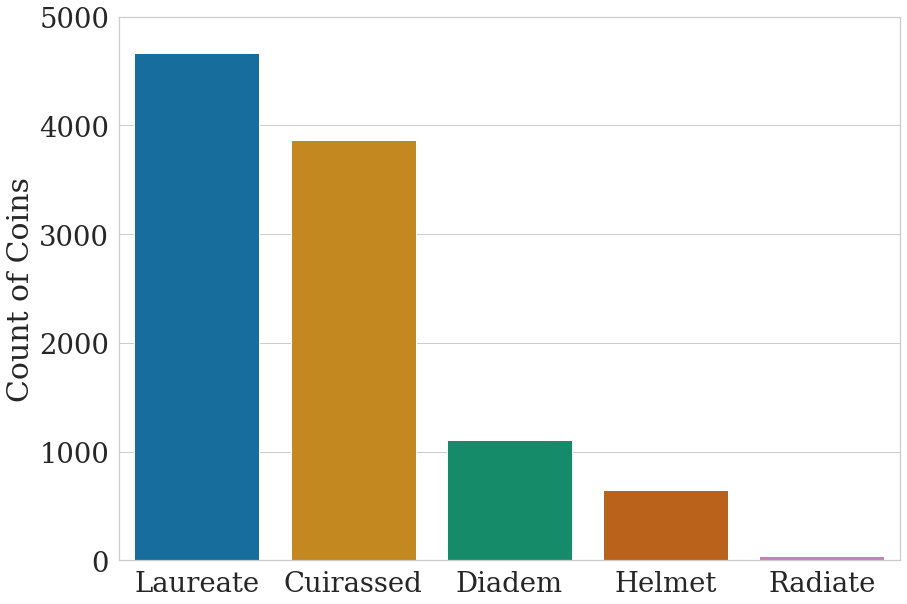

In [76]:
fig, ax = plt.subplots(figsize=(14,10))

keywords_order = ['Laureate', 'Cuirassed', 'Diadem', "Helmet", 'Radiate']
sns.barplot(x="keywords", y="counts", order=keywords_order, data=fig17_df)

ax.set_ylabel("Count of Coins")
ax.set_xlabel("")

ax.set_yticks(np.arange(0, 5001, 1000))
ax.set_ylim([0, 5000])

plt.savefig("img/Contantine_headgear_20210823.pdf", bbox_inches="tight") 

# Figure 18

In [87]:
fig18_df = data[["emperorDisplayed", "Obverse Type", "Reverse Type", "StartDate"]]
fig18_df["radiate"] = fig18_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and "sol" in str(row["Reverse Type"]).lower() else 0, axis=1)
fig18_df["sol"] = fig18_df["Reverse Type"].apply(lambda desc: 1 if "sol" in str(desc).lower() else 0)

fig18_df = fig18_df.groupby("emperorDisplayed").agg(["sum", "min"])
fig18_df.columns = [" ".join(col) for col in fig18_df]
fig18_df = fig18_df[["StartDate min", "radiate sum", "sol sum"]]

fig18_df = fig18_df[fig18_df["sol sum"] != 0]
fig18_df = fig18_df[fig18_df["radiate sum"] != 0]
fig18_df["percentage"] = 100.0 * fig18_df["radiate sum"] / fig18_df["sol sum"]
fig18_df = fig18_df.reset_index()
fig18_df = fig18_df.sort_values("StartDate min")

fig18_df

<ipython-input-87-c97be13072cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig18_df["radiate"] = fig18_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and "sol" in str(row["Reverse Type"]).lower() else 0, axis=1)
<ipython-input-87-c97be13072cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig18_df["sol"] = fig18_df["Reverse Type"].apply(lambda desc: 1 if "sol" in str(desc).lower() else 0)


,emperorDisplayed,StartDate min,radiate sum,sol sum,percentage
13,Lucius Verus,161.0,2,26,7.692308
2,Caracalla,196.0,27,99,27.272727
8,Elagabalus,218.0,3,48,6.250000
12,Gordian III,238.0,65,86,75.581395
26,Valerian,253.0,28,41,68.292683
11,Gallienus,253.0,48,67,71.641791
19,Postumus,259.0,15,20,75.000000
23,Regalianus,260.0,1,1,100.000000
21,Quietus,260.0,5,5,100.000000
14,Macrianus Minor,260.0,4,4,100.000000


In [88]:
fig18_df.to_csv("../Data/fig18.csv")

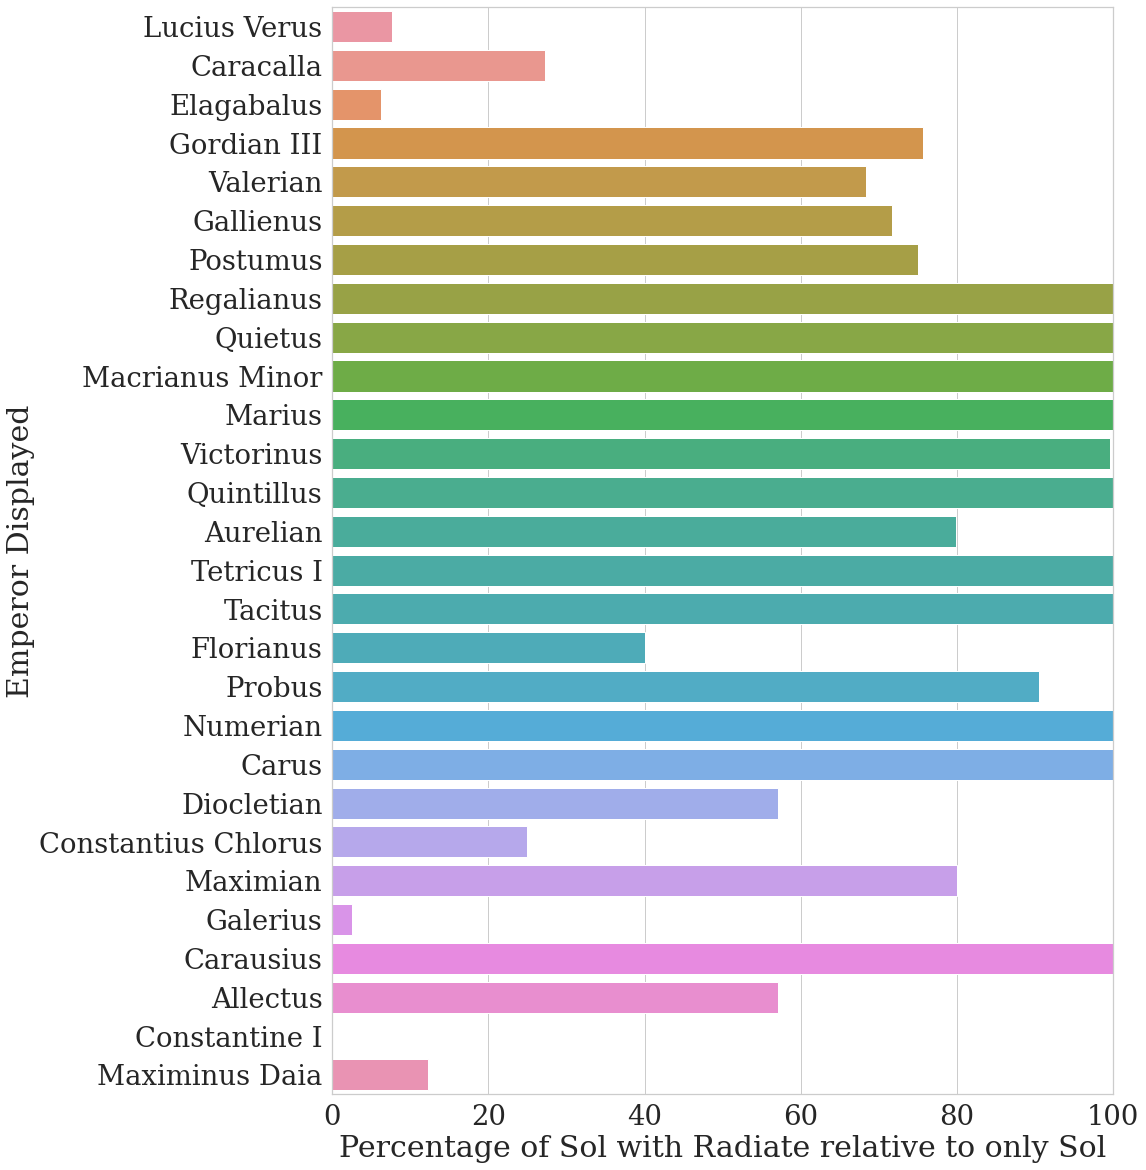

In [16]:
fig, ax = plt.subplots(figsize=(14,20))

sns.barplot(x="percentage", y="emperorDisplayed", data=fig18_df, ax=ax)

ax.set_ylabel("Emperor Displayed")
ax.set_xlabel("Percentage of Sol with Radiate relative to only Sol")

ax.set_xlim([0, 100])

plt.savefig("img/sol_radiate_percentage.pdf", bbox_inches="tight") 

# Figure 19/20

In [90]:
god = "jupiter"

fig_df = data[["emperorDisplayed", "Obverse Type", "Reverse Type", "cleanDesc", "StartDate"]]
fig_df["radiate"] = fig_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and god in str(row["Reverse Type"]).lower() else 0, axis=1)
fig_df["god"] = fig_df["Reverse Type"].apply(lambda desc: 1 if god in str(desc).lower() else 0)

fig_df = fig_df.groupby("emperorDisplayed").agg(["sum", "min"])
fig_df.columns = [" ".join(col) for col in fig_df]
fig_df = fig_df[["StartDate min", "radiate sum", "god sum"]]

fig_df = fig_df[fig_df["god sum"] != 0]

fig_df = fig_df.sort_values("StartDate min")
fig_df = fig_df.reset_index()

fig_df.head()

<ipython-input-90-3fb81af955e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df["radiate"] = fig_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and god in str(row["Reverse Type"]).lower() else 0, axis=1)
<ipython-input-90-3fb81af955e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df["god"] = fig_df["Reverse Type"].apply(lambda desc: 1 if god in str(desc).lower() else 0)


,emperorDisplayed,StartDate min,radiate sum,god sum
0,Augustus,-31.0,0,10
1,Nero,50.0,0,76
2,Vitellius,69.0,0,11
3,Vespasian,69.0,0,47
4,Otho,69.0,0,2


In [91]:
fig_df.to_csv("../Data/fig19.csv")

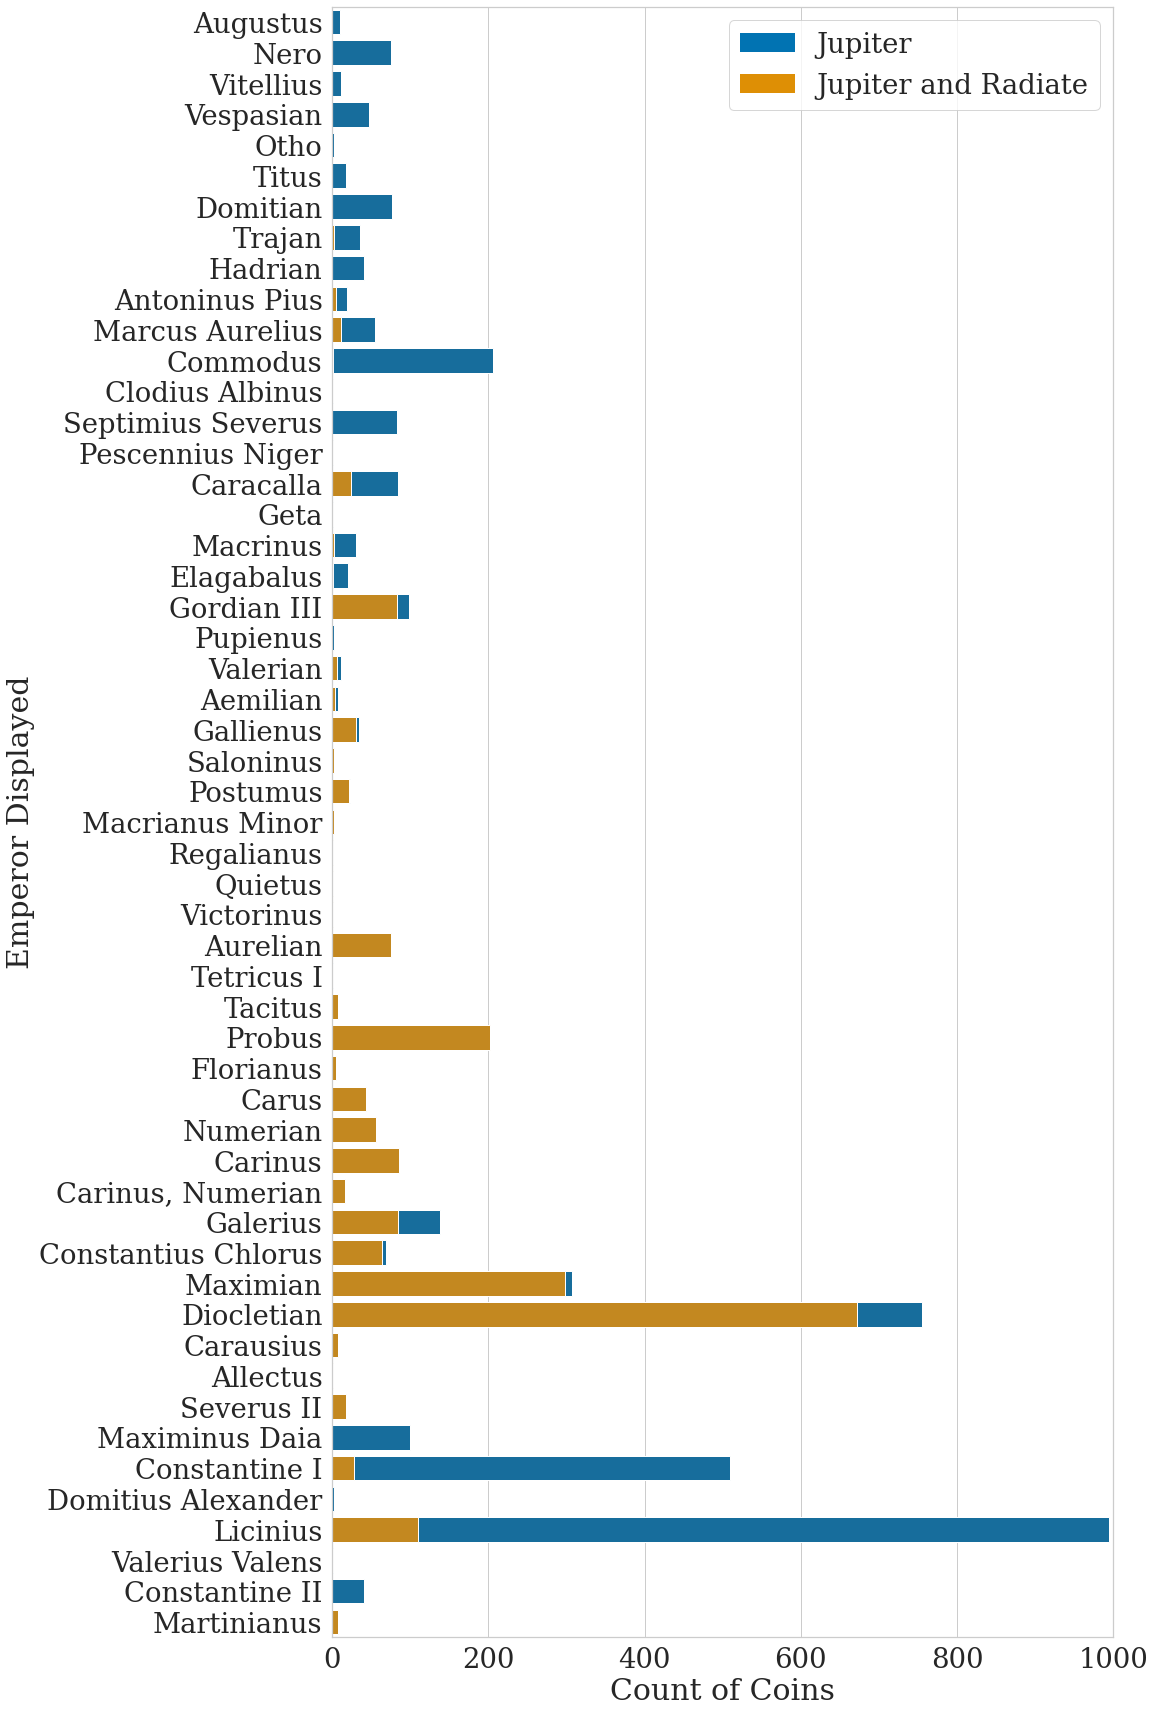

In [18]:
fig, ax = plt.subplots(figsize=(14, 30))

sns.barplot(x="god sum", y="emperorDisplayed", color=sns.color_palette()[0], data=fig_df, ax=ax)
sns.barplot(x="radiate sum", y="emperorDisplayed", color=sns.color_palette()[1], data=fig_df, ax=ax)

ax.set_ylabel("Emperor Displayed")
ax.set_xlabel("Count of Coins")

ax.set_xlim([0, 1000])

god_only = plt.Rectangle((0,0), 1, 1, fc=sns.color_palette()[0], edgecolor='none')
god_and_radiate = plt.Rectangle((0,0), 1, 1, fc=sns.color_palette()[1],  edgecolor='none')
l = plt.legend([god_only, god_and_radiate], ['{}'.format(god.title()), '{} and Radiate'.format(god.title())], loc=1)

plt.savefig("img/jupiter_radiate_percentage.pdf", bbox_inches="tight") 

In [92]:
god = "mars"

fig_df = data[["emperorDisplayed", "Obverse Type", "Reverse Type", "cleanDesc", "StartDate"]]
fig_df["radiate"] = fig_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and god in str(row["Reverse Type"]).lower() else 0, axis=1)
fig_df["god"] = fig_df["Reverse Type"].apply(lambda desc: 1 if god in str(desc).lower() else 0)

fig_df = fig_df.groupby("emperorDisplayed").agg(["sum", "min"])
fig_df.columns = [" ".join(col) for col in fig_df]
fig_df = fig_df[["StartDate min", "radiate sum", "god sum"]]

fig_df = fig_df[fig_df["god sum"] != 0]

fig_df = fig_df.sort_values("StartDate min")
fig_df = fig_df.reset_index()

fig_df.head()

<ipython-input-92-58d71c939eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df["radiate"] = fig_df.apply(lambda row: 1 if "radiate" in str(row["Obverse Type"]).lower() and god in str(row["Reverse Type"]).lower() else 0, axis=1)
<ipython-input-92-58d71c939eba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df["god"] = fig_df["Reverse Type"].apply(lambda desc: 1 if god in str(desc).lower() else 0)


,emperorDisplayed,StartDate min,radiate sum,god sum
0,Augustus,-31.0,0,67
1,Nero,50.0,0,52
2,Galba,68.0,0,1
3,Vespasian,69.0,1,100
4,Vitellius,69.0,0,32


In [93]:
fig_df.to_csv("../Data/fig20.csv")

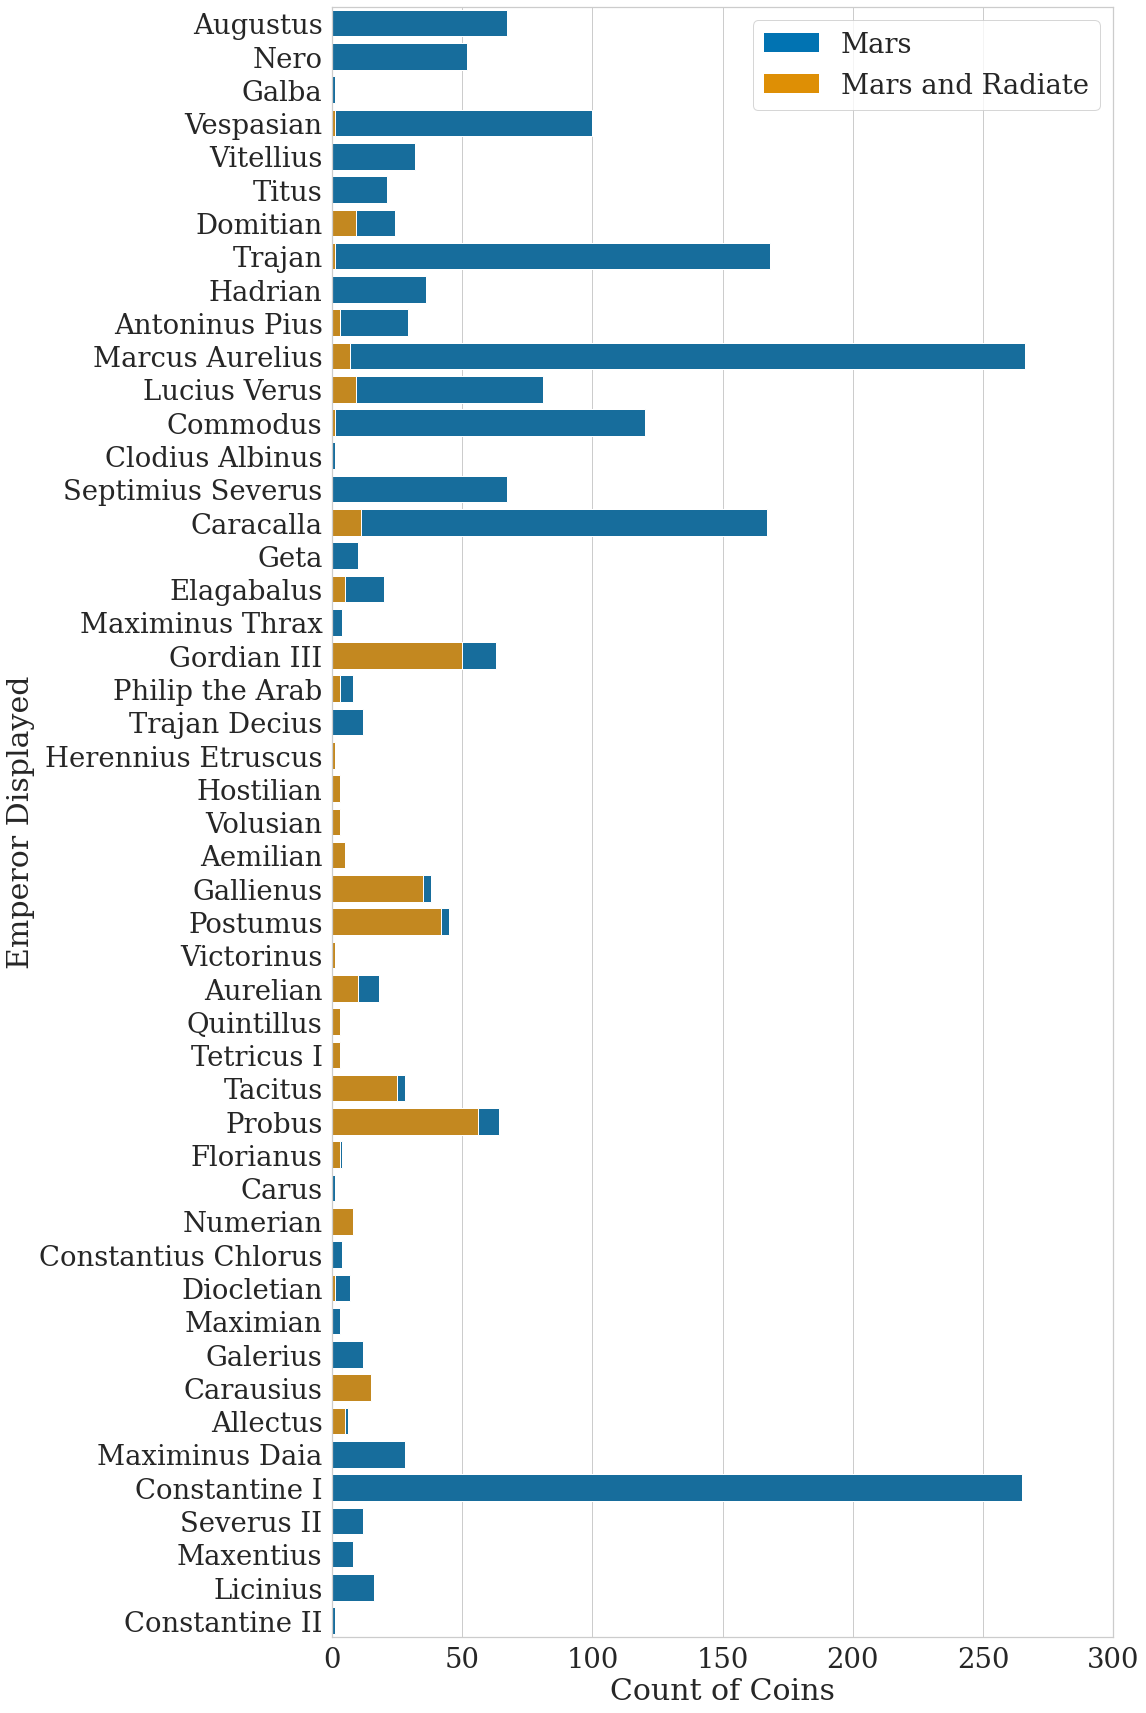

In [20]:
fig, ax = plt.subplots(figsize=(14, 30))

sns.barplot(x="god sum", y="emperorDisplayed", color=sns.color_palette()[0], data=fig_df, ax=ax)
sns.barplot(x="radiate sum", y="emperorDisplayed", color=sns.color_palette()[1], data=fig_df, ax=ax)

ax.set_ylabel("Emperor Displayed")
ax.set_xlabel("Count of Coins")

ax.set_xlim([0, 300])

god_only = plt.Rectangle((0,0), 1, 1, fc=sns.color_palette()[0], edgecolor='none')
god_and_radiate = plt.Rectangle((0,0), 1, 1, fc=sns.color_palette()[1],  edgecolor='none')
l = plt.legend([god_only, god_and_radiate], ['{}'.format(god.title()), '{} and Radiate'.format(god.title())], loc=1)

plt.savefig("img/mars_radiate_percentage.pdf", bbox_inches="tight") 